In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import tikzplotlib

In [2]:
linear = pd.read_csv('linear.csv')
luigi = pd.read_csv('luigi.csv')
parallel_c = pd.read_csv('parallel-circuit.csv')
linear_c = pd.read_csv('singlecore-circuit.csv')

In [3]:
linear

,n_inputs,example,avg
0,1,linear,0.1339
1,10,linear,1.3360
2,100,linear,13.3100
3,200,linear,26.6200
4,400,linear,53.1400
5,600,linear,79.9200
6,800,linear,106.6000
7,1000,linear,133.0000
8,1200,linear,159.9000
9,1400,linear,186.5000


In [4]:
def plot(d1, d2, filename):
    d1_label = d1['example'].unique()[0]
    d2_label = d2['example'].unique()[0]
    plt.plot(d2['n_inputs'], d2['avg'], label=d2_label, marker='x')
    plt.plot(d1['n_inputs'], d1['avg'], label=d1_label, marker='x')
    
    plt.ylabel('Runtime (s)')
    plt.xlabel('Number of inputs')
#     plt.yscale('log')
#     plt.xscale('log')
    plt.legend()
    tikzplotlib.save(filename)

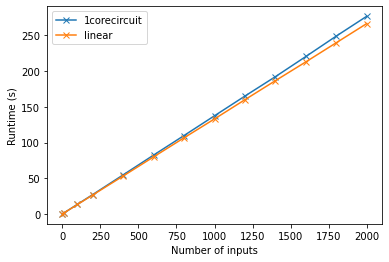

In [5]:
plot(linear, linear_c, 'linear_vs_linear_c.tex')

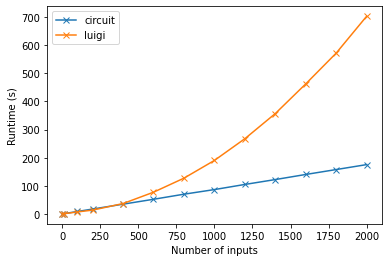

In [6]:
plot(luigi, parallel_c, 'luigi_vs_parallel_c.tex')

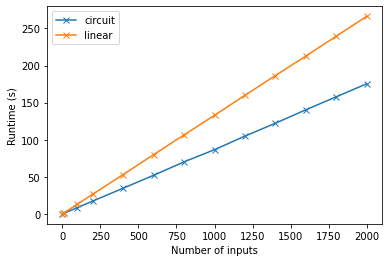

In [7]:
plot(linear, parallel_c, 'linear_vs_parallel_c.tex')

In [8]:
def speedup(d1, d2, filename):
    d1_label = d1['example'].unique()[0]
    d2_label = d2['example'].unique()[0]
    plt.bar(d1['n_inputs'].apply(str), d2['avg']/d1['avg'])
    print((d2['avg']/d1['avg']).mean())
#     plt.plot(d2['n_inputs'], d2['avg'], label=d2_label, marker='x')
    plt.ylabel('Speedup')
    plt.xlabel('Number of inputs')
#     plt.legend()
    tikzplotlib.save(filename)

1.5313975031938867


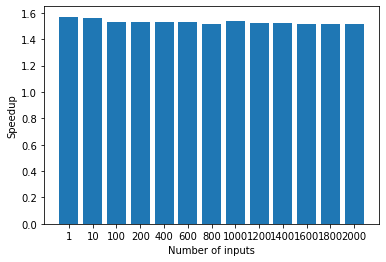

In [9]:
speedup(parallel_c, linear, 'parallel_speedup.tex')